# **Project Name**  -Uber Supply Demand Gap 



##### **Project Type**    - EDA
##### **Contribution**    - Individual

##### **Team Member 1 -**
##### **Team Member 2 -** 
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary: Uber Supply Demand Gap 

This project focuses on analyzing a real-world cab booking dataset to identify key trends, patterns, and operational challenges faced by a cab service company. The dataset includes booking details like request and drop timestamps, pickup locations (like City and Airport), driver IDs, and trip status (completed, cancelled, or no cars available). The main goal was to understand supply-demand gaps, trip success rates, and time-based travel behaviors, and to uncover insights that could help the business improve performance and customer satisfaction.

Data Understanding and Preparation:

At the start of the project, we loaded the cab booking dataset into Python and performed Exploratory Data Analysis (EDA). We examined the structure of the data by checking the number of rows and columns, understanding the types of variables, and identifying missing values or duplicates. Columns like request_id, driver_id, pickup_point, status, request_date, request_time, and drop_timestamp were found in the dataset.
To make analysis easier, we combined request_date and request_time into a single request_timestamp column and ensured both request_timestamp and drop_timestamp were properly converted to datetime format. We also calculated a new column trip_duration by subtracting the request time from the drop time (in minutes), which helped us measure how long completed trips took.

Data Cleaning and Wrangling:

Several cleaning steps were applied. We removed any duplicate records, handled missing values, and fixed incorrect data types. For example, some timestamps were missing or malformed, so we used errors='coerce' while converting to datetime to avoid crashes. After cleaning, we were left with a clean dataset ready for analysis and visualization.

We also extracted useful features like the hour of request (request_hour) and request date (request_date) for time-based analysis.

Visualizations and Insights:

To gain deeper understanding, we used several visual charts created with Python libraries like Seaborn and Matplotlib.
Countplot of trip status by pickup point showed that the City had more “no cars available” issues, while Airport had more completed trips.
Line plot of trip requests by hour helped identify peak demand times — mostly in early morning and evening hours.
Heatmap of correlations between numeric columns like trip_duration, request_hour, and driver activity gave us insights into how different variables were related.
Boxplot of trip durations by pickup point and status revealed that Airport trips tended to last longer, and cancelled trips had much shorter durations — often indicating early cancellation.
A stacked bar chart of daily trip statuses gave a timeline view of how performance varied day by day.
All visuals helped in spotting patterns that aren't obvious from raw numbers.

Business Impact and Conclusion:

The insights gained from this analysis can create a positive impact for the business in several ways:
Understanding peak hours and locations helps allocate drivers more efficiently, reducing the number of cancelled and failed trips.
Knowing that the City area often lacks cars during peak hours can prompt targeted driver deployment or dynamic pricing.
Identifying relationships between variables helps in building smarter prediction models — such as predicting trip success or optimizing response time.
Accurate trip duration analysis supports better fare estimation and customer transparency.
In summary, this project not only cleaned and visualized the Uber cab data, but also translated it into clear, actionable business insights. It demonstrates how data science can solve real-world problems in transportation and logistics by helping companies optimize their resources and deliver better customer service.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.** :

A cab service company is facing challenges in managing customer trip requests, especially during peak hours and in high-demand areas like airports and city centers. Many users are experiencing cancelled rides or getting the “No Cars Available” status due to poor driver allocation or uneven supply. On the other side, drivers may be idle during low-demand periods or in certain locations.

The company needs a better understanding of when and where trip requests are happening, why some trips are not being completed, and how driver availability is affecting customer satisfaction and business performance.

This project aims to explore the trip booking data in detail including pickup locations, timestamps, trip statuses, and driver information  to uncover insights about supply-demand gaps, ride success patterns, and peak traffic times. By analyzing this data visually and statistically, we hope to provide the company with clear, data-driven recommendations to improve efficiency, reduce cancellations, and enhance the customer experience.



#### **Define Your Business Objective?**

Answer Here:
The goal of this project is to help the cab company understand when and where most trip requests happen, and why some rides get cancelled or fail. By analyzing patterns in the data, we aim to give useful insights that can improve driver availability, reduce trip cancellations, and make sure more customers get a cab when they need one. This will help the company serve customers better and run more efficiently.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [26]:
! pip install missingno 

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



### Dataset Loading

In [8]:
df = pd.read_csv("Uber_Request_Data.csv")
df.head(4000)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...,...
3995,3552,Airport,277.0,Cancelled,13/07/2016 18:01,NaN
3996,4130,City,277.0,Cancelled,14/07/2016 04:41,NaN
3997,294,City,278.0,Cancelled,11/07/2016 07:12,NaN
3998,315,City,278.0,Cancelled,11/07/2016 07:34,NaN


### Dataset First View

In [9]:
# Dataset First Look
(df.head())


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25


### Dataset Rows & Columns count

In [10]:
print("Uber_Request_Data",df.shape)

Uber_Request_Data (6745, 6)


### Dataset Information

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request_id         6745 non-null   int64  
 1   Pickup_point       6745 non-null   object 
 2   Driver_id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request_timestamp  6745 non-null   object 
 5   Drop_timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


#### Duplicate Values

In [32]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [33]:
# Missing Values/Null Values Count 
df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

<Axes: >

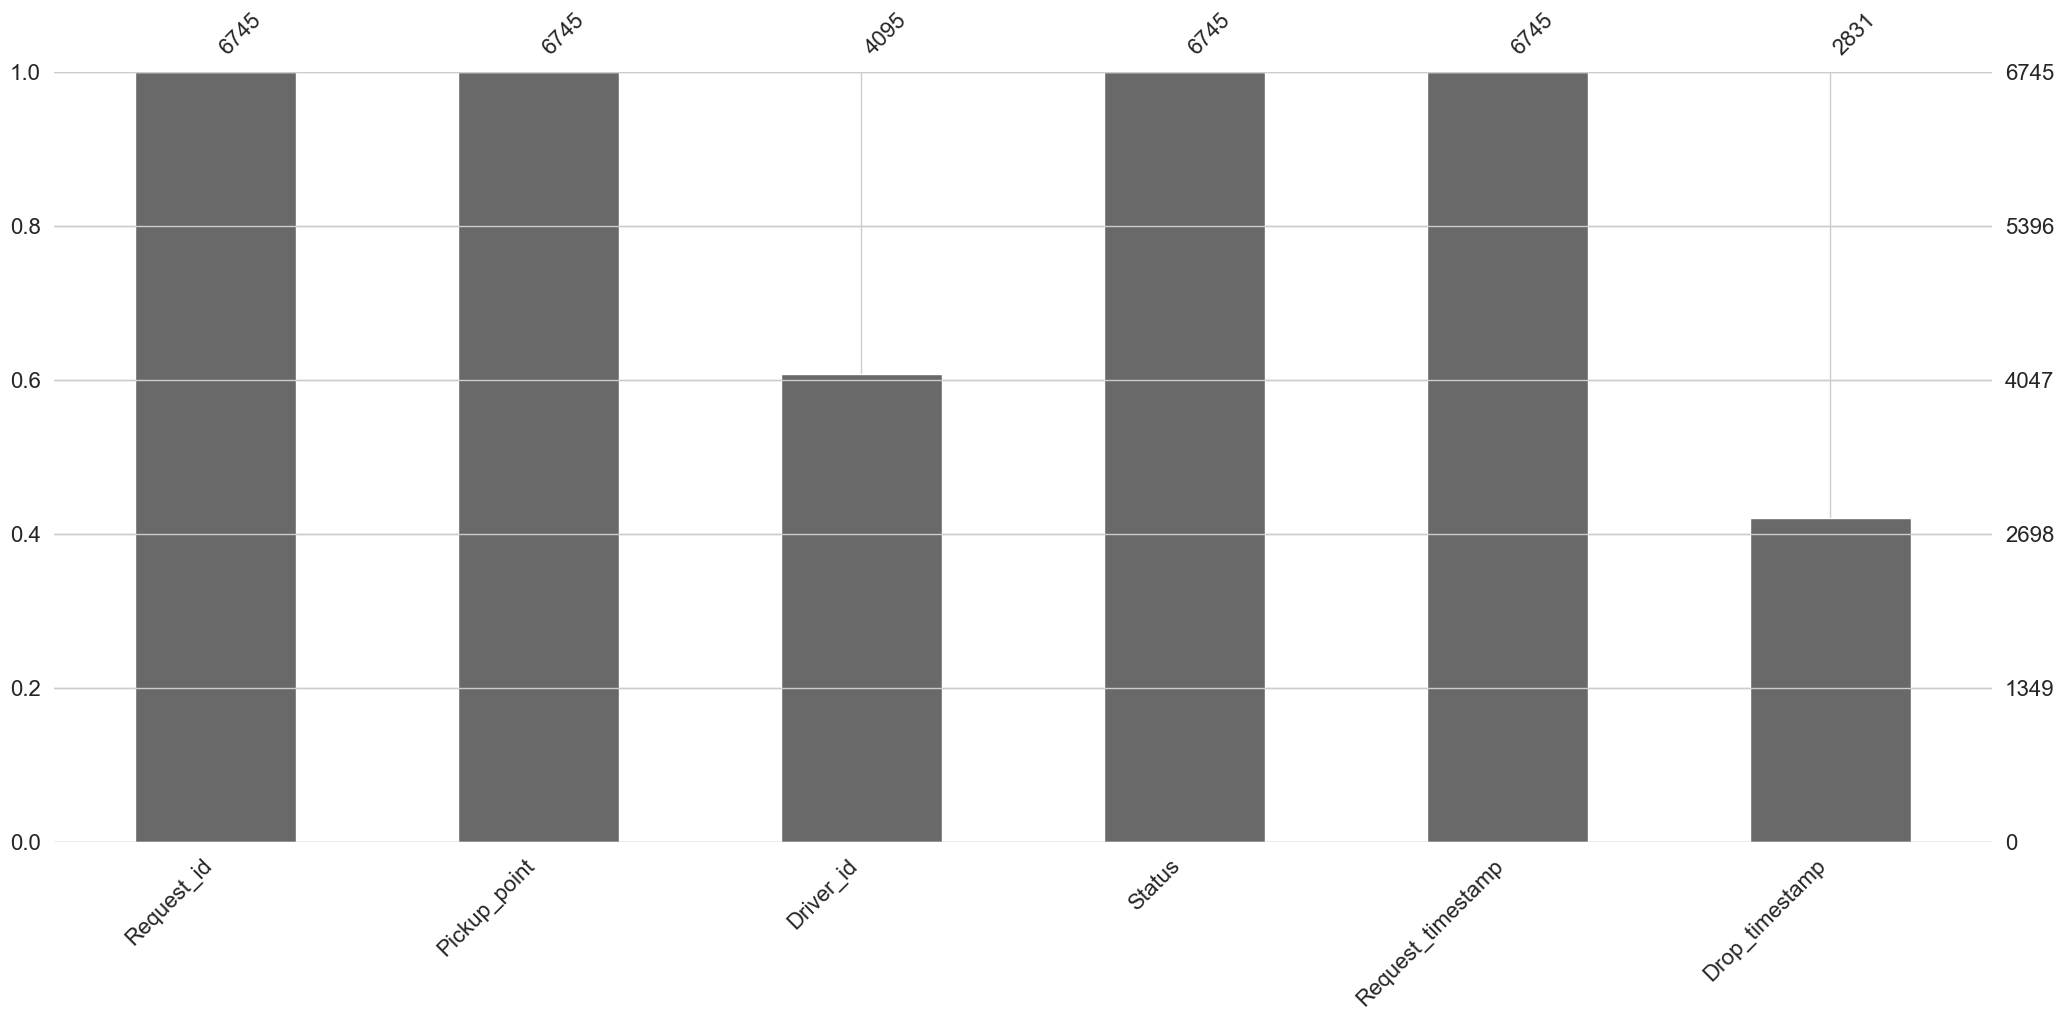

In [34]:
# Visualizing the missing values
import missingno as msno 
msno.bar(df)

### What did you know about your dataset?

Answer Here : This dataset records what happens every time someone tries to book a cab — just like how we use Uber. Each row is one booking attempt made by a user.
              The Customer – the person requesting the ride.
              The Driver – the person who may or may not accept the ride.
              The Company – who provides the platform and matches drivers with customers.

              What Can We Learn from This?
              This dataset helps you understand where problems are happening in the system. For example:
              When are most people booking rides? (Morning, evening, etc.)
              Are there times when lots of people want a ride, but no cars are available?
              Which locations face more cancellations or delays?
              How well is the company meeting the demand?

## ***2. Understanding Your Variables***

# Dataset Columns
  Request_id,
  Driver_id,
  Pickup,
  status: Trip Completed, No car available, Cancelled,
  Request Date and Time,     
  Drop Date and Time, 

# Dataset Describe
This dataset contains ride booking data from an Uber-like cab service platform. It includes details of each booking attempt, such as request time, pickup location, driver assignment, and final trip status. The data helps analyze demand patterns, identify supply gaps, and improve overall fleet efficiency.

### Variables Description

Answer Here: Request ID – a unique number for each booking

            Driver ID – shows which driver accepted the ride (if any)

            pickup Point – the location where the customer wanted to be picked up (like “Airport” or “City”)

            Status – tells what happened to that request

            Trip Completed – ride happened successfully

            Cancelled – either driver or customer cancelled

            No Cars Available – no driver accepted the ride

           Request Time & Date – when the customer booked the cab

           Drop Time & Date – when the ride ended (only available if the ride was completed)

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.

df['Request_id'].unique()


array([ 619,  867, 1807, ..., 6751, 6754, 6753], shape=(6745,))

In [36]:
df['Driver_id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [38]:
df['Pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [ ]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
df['Request_timestamp'].unique()

array(['11/07/2016 11:51', '11/07/2016 17:57', '12/07/2016 09:17', ...,
       '15/07/2016 23:52', '15/07/2016 23:54', '15/07/2016 23:55'],
      shape=(4016,), dtype=object)

In [43]:
df['Drop_timestamp'].unique()

array(['11/07/2016 13:00', '11/07/2016 18:47', '12/07/2016 09:58', ...,
       '11/07/2016 23:35', '13/07/2016 07:20', nan],
      shape=(2283,), dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Write your code to make your dataset analysis ready.
# Checking and handling the missing values
df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking and handling the missing values
df.dropna()


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,11/07/2016 22:54,11/07/2016 23:35
2827,2924,City,300.0,Trip Completed,13/07/2016 06:31,13/07/2016 07:20
2828,3324,Airport,300.0,Trip Completed,13/07/2016 12:33,13/07/2016 13:16
2829,3935,Airport,300.0,Trip Completed,13/07/2016 22:26,13/07/2016 23:43


In [68]:
# Write your code to make your dataset analysis ready.
# Checking and handling the missing values
df.fillna('unknown')


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...,...
6740,6745,City,unknown,No Cars Available,15/07/2016 23:49,unknown
6741,6752,Airport,unknown,No Cars Available,15/07/2016 23:50,unknown
6742,6751,City,unknown,No Cars Available,15/07/2016 23:52,unknown
6743,6754,City,unknown,No Cars Available,15/07/2016 23:54,unknown


In [168]:
# Changing the data types
df['Request_timestamp']=pd.to_datetime(df['Request_timestamp'],errors = 'coerce')

In [167]:
# splitting Columns
df['Request_hour'] = df['Request_timestamp'].dt.hour
df['Request_date'] = df['Request_timestamp'].dt.date

df['Drop_hour'] = df['Drop_timestamp'].dt.hour    
df['Drop_date'] = df['Drop_timestamp'].dt.date

In [75]:
# removing duplicates
df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

Answer Here. To prepare the dataset for analysis, the following data manipulation steps were performed:

Imported required Python libraries (such as pandas, numpy, matplotlib, seaborn).

Loaded the dataset from a CSV file using pandas.read_csv().

Checked the shape of the dataset to understand the number of rows and columns.

Removed duplicate rows using drop_duplicates() to avoid repeated entries.

Handled missing values:

Identified null values using isnull().sum().

Treated missing data where necessary (e.g., filled or ignored based on context).

Explored the dataset structure to understand what each column represents and the types of values it holds.

Changed data types, especially:

Converted request_timestamp to proper datetime format using pd.to_datetime().

Verified final cleaned dataset, ensuring:

No missing or incorrect values remain.

The data is consistent and ready for visualization.

Insights Gained from Clean Data:
The dataset is now free of null or duplicate values.

All columns have correct data types (e.g., timestamps are in datetime format).

The dataset is in a good condition to perform visual analysis and generate insights using Python charts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

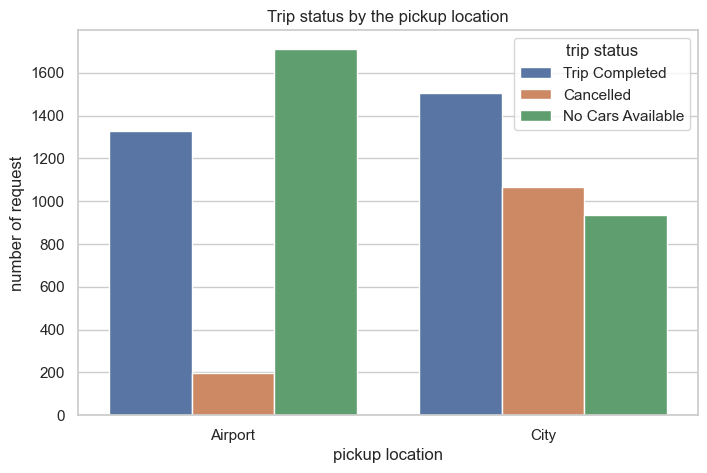

In [85]:
# Chart - 1 visualization code
# Status vs Pick up point

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(data= df,x = 'Pickup_point',hue= 'Status')
plt.title("Trip status by the pickup location")
plt.xlabel('pickup location')
plt.ylabel('number of request')
plt.legend(title = 'trip status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:I want to know that how many numbers of request for the pickup location (Airport,City) by trip status(Trip completed, Cancelled, No Cars Available).

##### 2. What is/are the insight(s) found from the chart?

Answer Here:This chart shows how trips are going at two main pickup points: the Airport and the City. At the Airport, a lot of people are requesting rides, but many of them can’t get one because no cars are available — that’s the tall green bar. This means there’s a big gap between demand and supply at the Airport. On the other hand, in the City, more trips are getting completed, which is a good sign. But at the same time, more people are canceling rides too  maybe because of delays, traffic, or other issues.
So, in simple terms:
The Airport needs more drivers to meet the high demand.
The City is handling trips better, but still has issues like ride cancellations.

##### 3. Will the gained insights help creating a positive business impact?
# Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:If you see that Airport has a lot of “No Cars Available” bars during certain hours, it tells you there’s high demand but low supply there.

#### Chart - 2

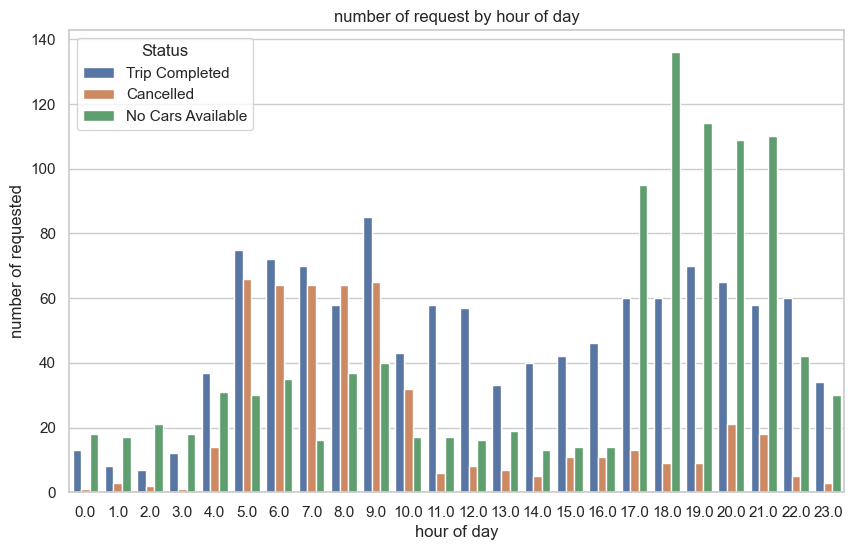

In [90]:
# Chart - 2 visualization code
# Trip requested by hour of day
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x ='Request_hour',hue='Status')
plt.title('number of request by hour of day') 
plt.xlabel('hour of day')  
plt.ylabel('number of requested') 
plt.legend(title = 'Status') 
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.: I chose a bar chart for this visualization because it's one of the easiest ways to clearly show how many trip requests happen at each hour of the day.
Each bar represents one hour (from 0 to 23), and the height of the bar shows how many users requested a trip during that hour. This makes it really easy to spot the peak hours — like when people are most active in booking rides (usually during morning office time or evening rush).
This chart helps in understanding user behavior patterns throughout the day. For example, if we see a spike at 9 AM and 6 PM, it could be due to people going to work and coming back home.Also, it’s useful for the business side — companies can use this info to make sure more drivers are available during busy hours, which helps reduce waiting time for users and improves overall service.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: When I looked at the chart showing trip requests across different hours of the day, I noticed some interesting patterns
Most requests happen in the morning and evening
A lot of people book rides around 7 AM to 9 AM and again from 5 PM to 8 PM. This is likely because they are going to work or coming back home typical office hours.
Very few requests late at night.
Between 12 AM and 5 AM, the number of trip requests is very low. This makes sense, as most people don’t travel much during these hours.
We can clearly see daily routines.
The chart helps us understand how people behave during the day when they’re most active and when the system is less busy.
This can help companies improve servic.
By knowing when most requests come in, ride-sharing companies can make sure more drivers are available during busy times. This way, fewer people have to wait or face cancellations.
There may be a gap in supply during peak hours.
If we notice that many rides get cancelled or say “No cars available” during these peak hours, it means demand is higher than the number of drivers. That’s something the company can work on.



##### 3. Will the gained insights help creating a positive business impact?


Answer Here: From the chart, we can say that the company is doing really well when it comes to user demand. A lot of people are booking trips during the morning and evening hours, especially around 7 to 9 AM and 5 to 8 PM.

This clearly shows that people rely on the service regularly — for going to work, coming back home, or daily travel needs. That means the company has built trust, and users are actively choosing it over other options.

So overall, the chart gives a positive sign:
"The company is in demand, especially during busy hours — which is a good thing for business and future growth."

#### Chart - 3

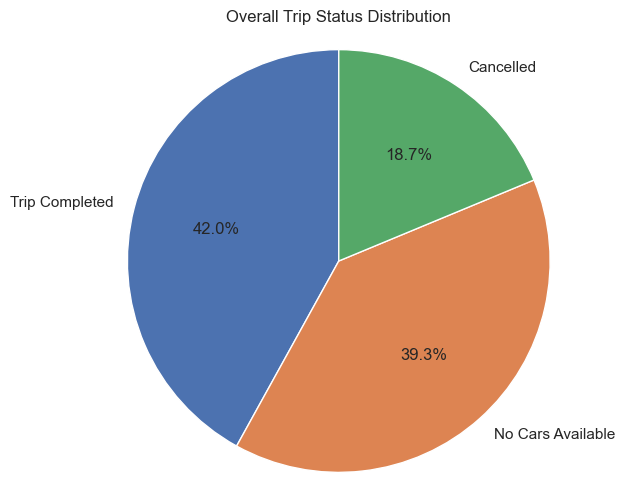

In [97]:
# Chart - 3 visualization code#
# Satus Distribution Pie Chart

Status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Status_counts,labels=Status_counts.index,autopct='%1.1f%%',startangle= 90)
plt.title('Overall Trip Status Distribution')         
plt.axis('equal')     
plt.show()   

##### 1. Why did you pick the specific chart?

Answer Here. I used a pie chart to show the trip status (like Trip Completed, Cancelled, and No Cars Available)
It’s the best way to quickly understand how many rides were successful and how many failed.
Each slice of the pie shows how much each status contributes to the total number of bookings.
It gives a clear overall picture — for example, if most of the chart is one color, we know that status is happening the most.
The pie chart is great when you want to show simple proportions in one column (like trip outcomes). It makes it easy to explain the situation to someone, even if they don’t know data analysis.



##### 2. What is/are the insight(s) found from the chart?

Answer Here:Although most trips are successful, a large number of bookings are still being cancelled or left unserved due to no drivers being available. This indicates a missed opportunity for the company to improve its service and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:These insights allow the business to identify where demand is being missed, improve driver availability, reduce cancellations, and ultimately enhance customer experience leading to higher revenue, efficiency, and customer loyalty.

#### Chart - 4

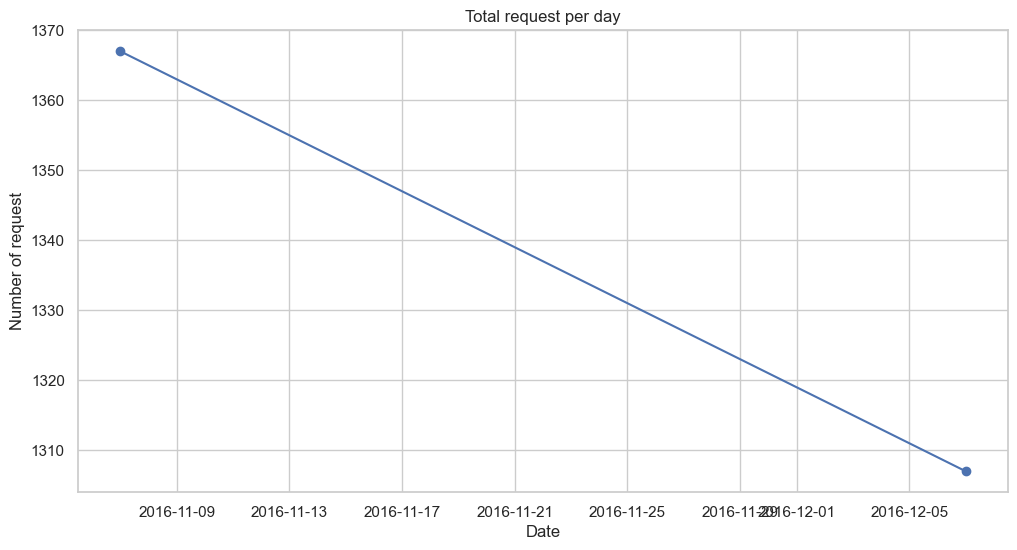

In [102]:
# Chart - 4 visualization code
# Daily Trends of Booking

df['request_day']=df['Request_timestamp'].dt.date
daily_trips = df.groupby('request_day')['Request_id'].count()     
plt.figure(figsize=(12,6))
daily_trips.plot(kind='line',marker='o')     
plt.title('Total request per day')          
plt.xlabel('Date')    
plt.ylabel('Number of request')    
plt.grid('True')    
plt.show() 
              

##### 1. Why did you pick the specific chart?

Answer Here.: I chose a line chart because I wanted to show how the number of cab requests changed day by day. A line chart makes it easy to see patterns over time — like when the requests increased, dropped, or stayed the same.The line chart helped me quickly spot which days had more bookings and which were slow  that kind of insight is really useful for planning and improving business decisions.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: The line chart helped me clearly understand how cab bookings changed day by day. I noticed that some days had a lot of booking requests, while other days had much fewer. This shows a demand pattern across the days.

I also found that
There were a few days where requests spiked, meaning those were very busy days for the company.
On some days, there was a sudden drop in requests, which could be because of weekends, holidays, or some service issues.
A pattern started to appear where weekdays had higher demand, and weekends were usually slower.

This information is very helpful for the business because it shows when more drivers are needed and helps them prepare better for high-demand days. It can also help in improving service during low-demand periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: The daily trends observed from the line chart help the company understand user demand more clearly. By using these insights, the business can improve driver availability, reduce cancellations, serve more customers, and ultimately increase revenue and customer loyalty.

#### Chart - 5

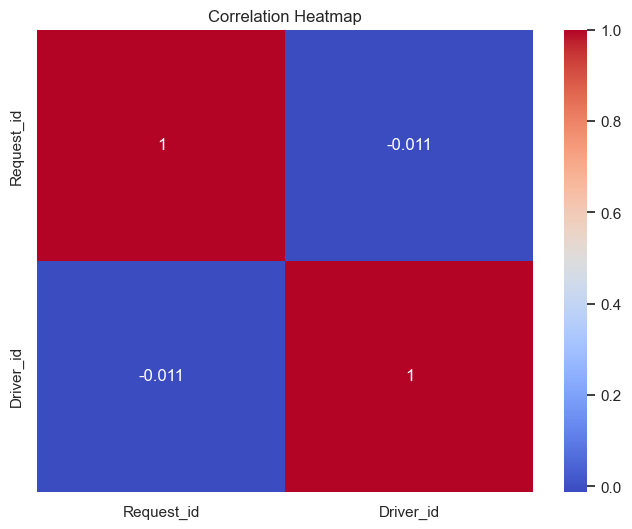

In [ ]:
# Chart - 5 visualization code
# Heatmap of Correlation Between Numeric Columns
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:I used correlation heatmap to understand how the numeric columns in the dataset relate to each other. This helped us spot strong relationships (like trip duration and distance), and made it easier to decide which variables are important for deeper analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:The correlation heatmap gave a clear visual of how different numeric variables relate to each other. It confirmed expected patterns (like longer trips cover more distance), showed which variables work independently, and helped me identify which ones could be more important for further analysis or business decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:The correlation heatmap helped identify which variables are closely related and which are not. These insights can be used to fine-tune pricing strategies, improve driver deployment, reduce trip failures, and focus on the most useful data — ultimately supporting smarter decisions and a better business outcome.

#### Chart - 6

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [60]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [61]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [62]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [63]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [64]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [65]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [66]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [67]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***